
<h1><strong>Trabajo Práctico Integrador </strong></h1>
<h2>Dataset: Stellar Classification Dataset - SDSS17</h2>

<h3>Contexto</h3>

<p>
En astronomía, la clasificación estelar es la clasificación de las estrellas en función de sus características espectrales. El esquema de clasificación de galaxias, quásares y estrellas es uno de los más fundamentales en astronomía. La catalogación temprana de las estrellas y su distribución en el cielo ha llevado a comprender que forman nuestra propia galaxia y, tras la distinción de que Andrómeda era una galaxia separada de la nuestra, se comenzaron a estudiar numerosas galaxias a medida que se construían telescopios más potentes. Este datasat tiene como objetivo clasificar estrellas, galaxias y quásares en función de sus características espectrales.
</p>

<p>
Contenido
Los datos constan de 100.000 observaciones del espacio realizadas por el SDSS (Sloan Digital Sky Survey). Cada observación se describe mediante 17 columnas de características y 1 columna de clase que la identifica como estrella, galaxia o quásar.
</p>

1. obj_ID = Identificador de objeto, el valor único que identifica el objeto en el catálogo de imágenes utilizado por CAS
2. alpha = ángulo de Ascensión Recta (en la época J2000)
3. delta = ángulo de declinación (en la época J2000)
4. u = Filtro ultravioleta en el sistema fotométrico
5. g = Filtro verde en el sistema fotométrico
6. r = Filtro rojo en el sistema fotométrico
7. i = Filtro de infrarrojo cercano en el sistema fotométrico
8. z = Filtro de infrarrojos en el sistema fotométrico
9. run_ID = Número de ejecución utilizado para identificar el análisis específico
10. rereun_ID = Número de repetición para especificar cómo se procesó la imagen
11. cam_col = Columna de cámara para identificar la línea de exploración dentro de la ejecución
12. field_ID = Número de campo para identificar cada campo
13. spec_obj_ID = ID único utilizado para objetos espectroscópicos ópticos (esto significa que 2 observaciones diferentes con el mismo spec_obj_ID deben compartir la clase de salida)
14. class = clase de objeto (galaxia, estrella u objeto cuásar)
15. redshift = valor de corrimiento al rojo basado en el aumento de la longitud de onda
16. plate = ID de placa, identifica cada placa en SDSS
17. MJD = Fecha juliana modificada, utilizada para indicar cuándo se tomó un determinado dato del SDSS
18. fiber_ID = ID de fibra que identifica la fibra que apuntó la luz al plano focal en cada observación



<h3>Tabla de Contenidos</h3>
<a id="indice"></a>
<div>
    <ul>
        <li>
            <span>
                <a href="#importacion">
                    <span>1&nbsp;&nbsp;</span>
                    <strong>Importación de librerías</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#carga"><span>2&nbsp;&nbsp;</span>
                    <strong>Carga de datos</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#eda">
                    <span>3&nbsp;&nbsp;</span>
                    <strong>Análisis Exploratorio de Datos (EDA)</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#preprocesado">
                    <span>4&nbsp;&nbsp;</span>
                    <strong>Preprocesado de datos</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#division">
                    <span>5&nbsp;&nbsp;</span>
                    <strong>División en entrenamiento y prueba</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#pycaret">
                    <span>6&nbsp;&nbsp;</span>
                    <strong>Probemos autoML con pycaret</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#dt">
                    <span>7&nbsp;&nbsp;</span>
                    <strong>Primer modelo: Decision Tree</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#knn">
                    <span>8&nbsp;&nbsp;</span>
                    <strong>Segundo modelo: KNN (K Neighbors Classifier)</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#rf">
                    <span>9&nbsp;&nbsp;</span>
                    <strong>Tercer modelo: Random Forest</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#qda">
                    <span>10&nbsp;&nbsp;</span>
                    <strong>Cuarto modelo: QDA (Quadratic Discriminant Analysis)</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#lda">
                    <span>11&nbsp;&nbsp;</span>
                    <strong>Quinto modelo: LDA (Linear Discriminant Analysis)</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#lr">
                    <span>12&nbsp;&nbsp;</span>
                    <strong>Sexto modelo: LR (Logistic Regression)</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#lgbm">
                    <span>13&nbsp;&nbsp;</span>
                    <strong>Septimo modelo: Light Gradient Boosting Machine (lightgbm</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#conclusion">
                    <span>14&nbsp;&nbsp;</span>
                    <strong>Conclusión</strong>
                </a>
            </span>
        </li>
    </ul>
</div>

<a id="importacion"></a>
## 1. Importación de librerías

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

<a id="carga"></a>
## 2. Carga de datos

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [2]:
# Cargamos el dataset
df = pd.read_csv('data/star_classification.csv')

In [3]:
# Veamos las primeras 5 filas
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
df.shape

(100000, 18)

In [6]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [7]:
len(df.columns)


18

<a id="eda"></a>
## 3. Análisis exploratorio de datos(EDA)

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>



Veamos la información estadística del dataset

In [8]:
df.describe().T # Transpongo para que se vea mejor

count          mean           std           min           25%  \
obj_ID       100000.0  1.237665e+18  8.438560e+12  1.237646e+18  1.237659e+18   
alpha        100000.0  1.776291e+02  9.650224e+01  5.527828e-03  1.275182e+02   
delta        100000.0  2.413530e+01  1.964467e+01 -1.878533e+01  5.146771e+00   
u            100000.0  2.198047e+01  3.176929e+01 -9.999000e+03  2.035235e+01   
g            100000.0  2.053139e+01  3.175029e+01 -9.999000e+03  1.896523e+01   
r            100000.0  1.964576e+01  1.854760e+00  9.822070e+00  1.813583e+01   
i            100000.0  1.908485e+01  1.757895e+00  9.469903e+00  1.773228e+01   
z            100000.0  1.866881e+01  3.172815e+01 -9.999000e+03  1.746068e+01   
run_ID       100000.0  4.481366e+03  1.964765e+03  1.090000e+02  3.187000e+03   
rerun_ID     100000.0  3.010000e+02  0.000000e+00  3.010000e+02  3.010000e+02   
cam_col      100000.0  3.511610e+00  1.586912e+00  1.000000e+00  2.000000e+00   
field_ID     100000.0  1.861305e+02  1.490111e+02  1.100000e+01  8.200000e+01   
spec_obj_ID  100000.0  5.783882e+18  3.324016e+18  2.995191e+17  2.844138e+18   
redshift     100000.0  5.766608e-01  7.307073e-01 -9.970667e-03  5.451684e-02   
plate        100000.0  5.137010e+03  2.952303e+03  2.660000e+02  2.526000e+03   
MJD          100000.0  5.558865e+04  1.808484e+03  5.160800e+04  5.423400e+04   
fiber_ID     100000.0  4.493127e+02  2.724984e+02  1.000000e+00  2.210000e+02   

                      50%           75%           max  
obj_ID       1.237663e+18  1.237668e+18  1.237681e+18  
alpha        1.809007e+02  2.338950e+02  3.599998e+02  
delta        2.364592e+01  3.990155e+01  8.300052e+01  
u            2.217914e+01  2.368744e+01  3.278139e+01  
g            2.109983e+01  2.212377e+01  3.160224e+01  
r            2.012529e+01  2.104478e+01  2.957186e+01  
i            1.940514e+01  2.039650e+01  3.214147e+01  
z            1.900460e+01  1.992112e+01  2.938374e+01  
run_ID       4.188000e+03  5.326000e+03  8.162000e+03  
rerun_ID     3.010000e+02  3.010000e+02  3.010000e+02  
cam_col      4.000000e+00  5.000000e+00  6.000000e+00  
field_ID     1.460000e+02  2.410000e+02  9.890000e+02  
spec_obj_ID  5.614883e+18  8.332144e+18  1.412694e+19  
redshift     4.241733e-01  7.041543e-01  7.011245e+00  
plate        4.987000e+03  7.400250e+03  1.254700e+04  
MJD          5.586850e+04  5.677700e+04  5.893200e+04  
fiber_ID     4.330000e+02  6.450000e+02  1.000000e+03

Veamos los valores unicos de las columnas

In [9]:
# Recorro las columnas y muestro los valores unicos
for col in df.columns:
    print("Nombre Columna: ",col," valores únicos: ", len(df[col].unique()))

Nombre Columna:  obj_ID  valores únicos:  78053
Nombre Columna:  alpha  valores únicos:  99999
Nombre Columna:  delta  valores únicos:  99999
Nombre Columna:  u  valores únicos:  93748
Nombre Columna:  g  valores únicos:  92651
Nombre Columna:  r  valores únicos:  91901
Nombre Columna:  i  valores únicos:  92019
Nombre Columna:  z  valores únicos:  92007
Nombre Columna:  run_ID  valores únicos:  430
Nombre Columna:  rerun_ID  valores únicos:  1
Nombre Columna:  cam_col  valores únicos:  6
Nombre Columna:  field_ID  valores únicos:  856
Nombre Columna:  spec_obj_ID  valores únicos:  100000
Nombre Columna:  class  valores únicos:  3
Nombre Columna:  redshift  valores únicos:  99295
Nombre Columna:  plate  valores únicos:  6284
Nombre Columna:  MJD  valores únicos:  2180
Nombre Columna:  fiber_ID  valores únicos:  1000


In [10]:
# Veo los valores únicos de la columna 'cam_col'
df['cam_col'].unique()

array([2, 5, 3, 4, 6, 1])

In [11]:
# Los ordeno
np.sort(df['cam_col'].unique())

array([1, 2, 3, 4, 5, 6])

In [12]:
# Veo los valores únicos de la columna 'class'
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

cam_col posee 6 valores únicos.
class posee 3 valores unicos

Veamos cuales son.

Veamos la columna '``class``'

In [13]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

Visualizamos los datos

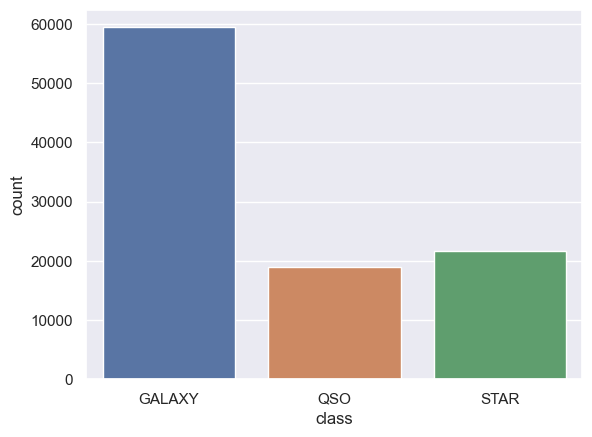

In [14]:
# Grafiquemos la distribución de las clases
sns.countplot(x='class', data=df)

plt.show()

Graficamos la distribucion de las columnas numericas

In [15]:
# Grafico las columnas para ver si siguen una distribución normal, en un grafico de 6x3

import matplotlib.pyplot as plt
import seaborn as sns

class Graficos:
    def plot_numerical_distributions(self, df, NUMERICAL_FEATURES):
        """
        Grafica las distribuciones de las características numéricas del DataFrame dado.

        :param df: DataFrame de Pandas que contiene los datos.
        :param NUMERICAL_FEATURES: Lista de nombres de columnas numéricas en el DataFrame.
        """

        # Crea una figura con una matriz de subgráficos de 6x3
        fig, axes = plt.subplots(7, 3, figsize=(12, 18))
        fig.subplots_adjust(hspace=0.5)  # Espacio vertical entre subgráficos

        # Define una paleta de colores única para cada característica numérica
        colors = sns.color_palette('deep', n_colors=len(NUMERICAL_FEATURES))

        # Itera a través de las características numéricas y dibuja los histogramas con colores diferentes
        for i, (column, color) in enumerate(zip(NUMERICAL_FEATURES, colors)):
            row, col = divmod(i, 3)  # Calcula la fila y la columna actual
            ax = axes[row, col]  # Obtiene el subgráfico actual
            sns.histplot(df[column], ax=ax, kde=True, color=color)  # Dibuja el histograma con color y curva de la distribución

            # Agrega un título al subgráfico
            ax.set_title(f'Distribución de {column}')

        # Añade un título a la figura
        fig.suptitle('Histogramas y Curvas de Distribución de características numéricas', fontsize=16)

        # Ajusta automáticamente los espacios entre los subgráficos y muestra la figura
        plt.tight_layout()
        plt.show()


In [16]:
graficos = Graficos()

In [15]:
columnas = df.columns.tolist()


CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 5.01 µs


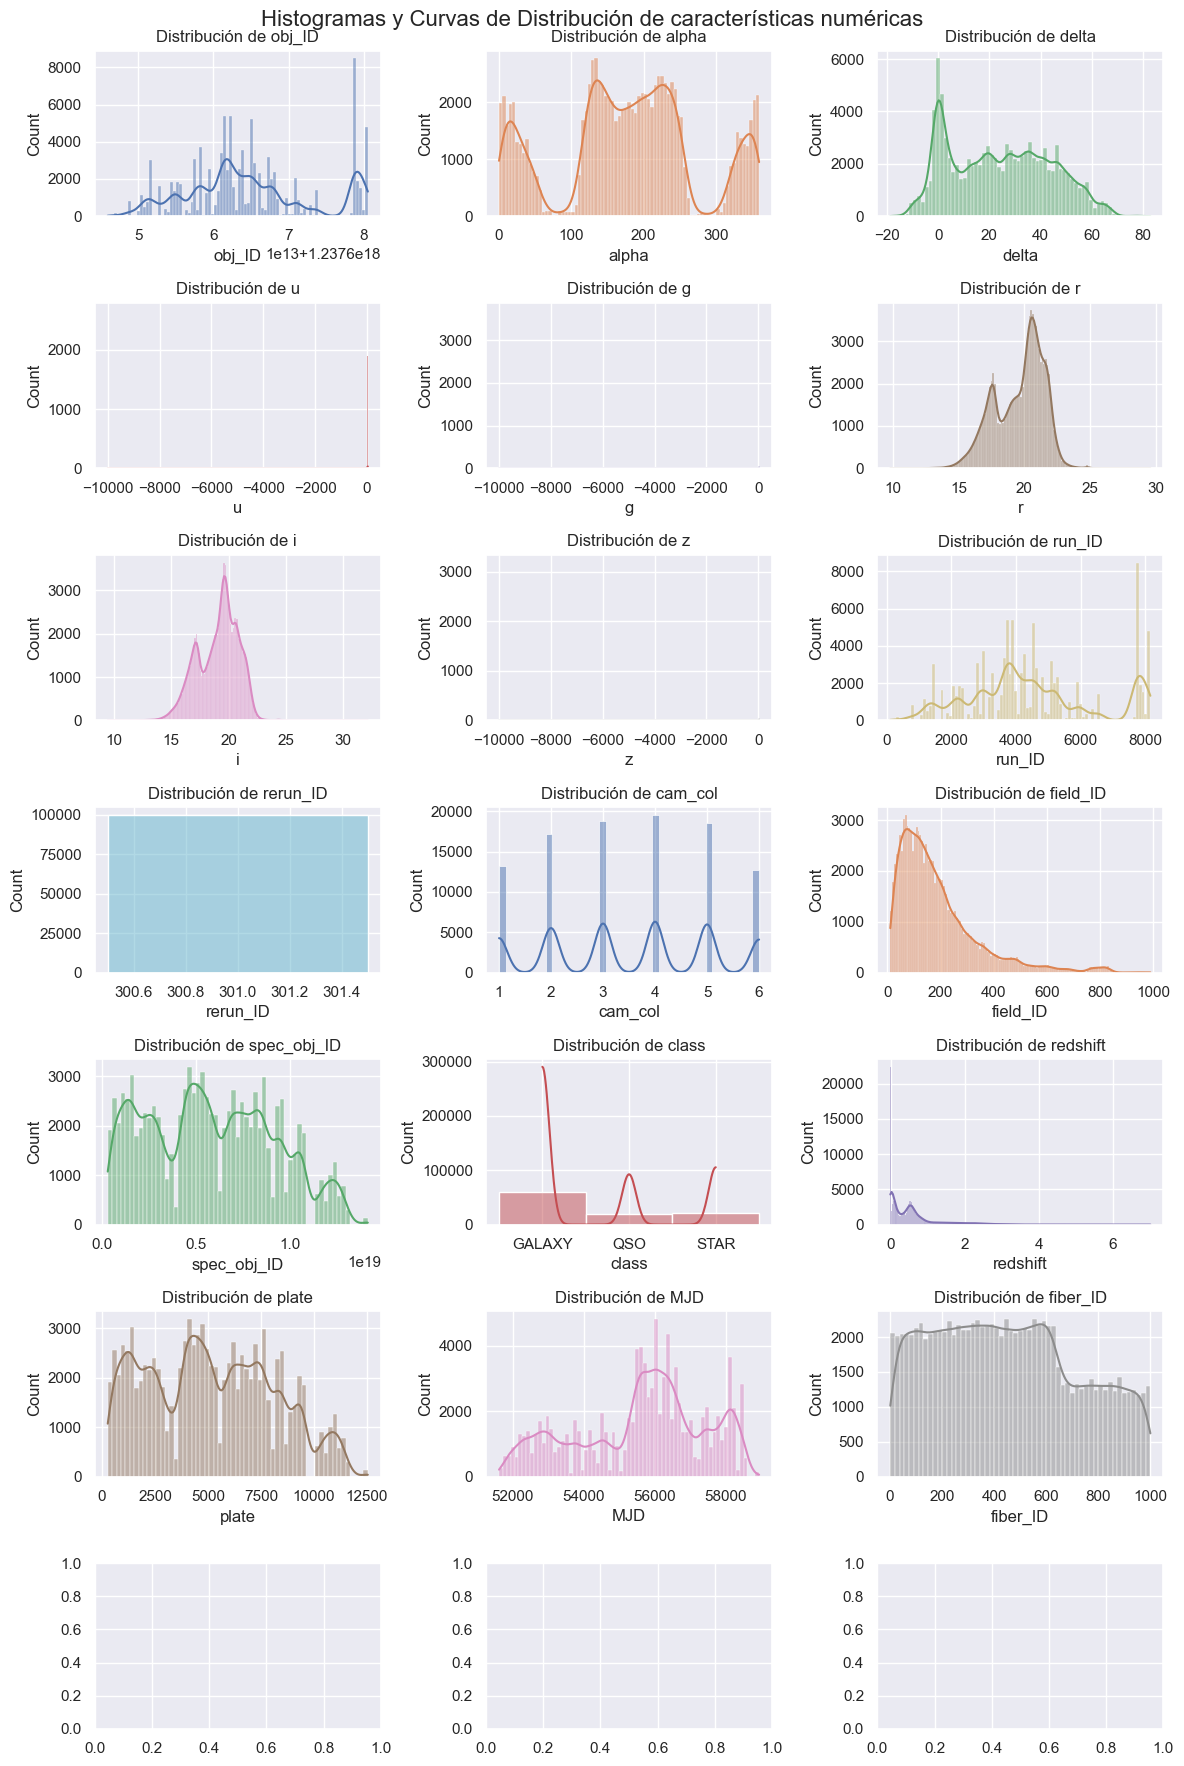

In [18]:
%time # Para ver cuanto tarda en ejecutarse esta celda

# Grafico las columnas para ver si siguen una distribución normal, en un grafico de 6x3
# Se puede comentarizar esta linea si no se quiere graficar

#graficos.plot_numerical_distributions(df_label_encoder, NUMERICAL_FEATURES)
graficos.plot_numerical_distributions(df, columnas)

Veamos la distribucion de las principales variables en funcion a la clase

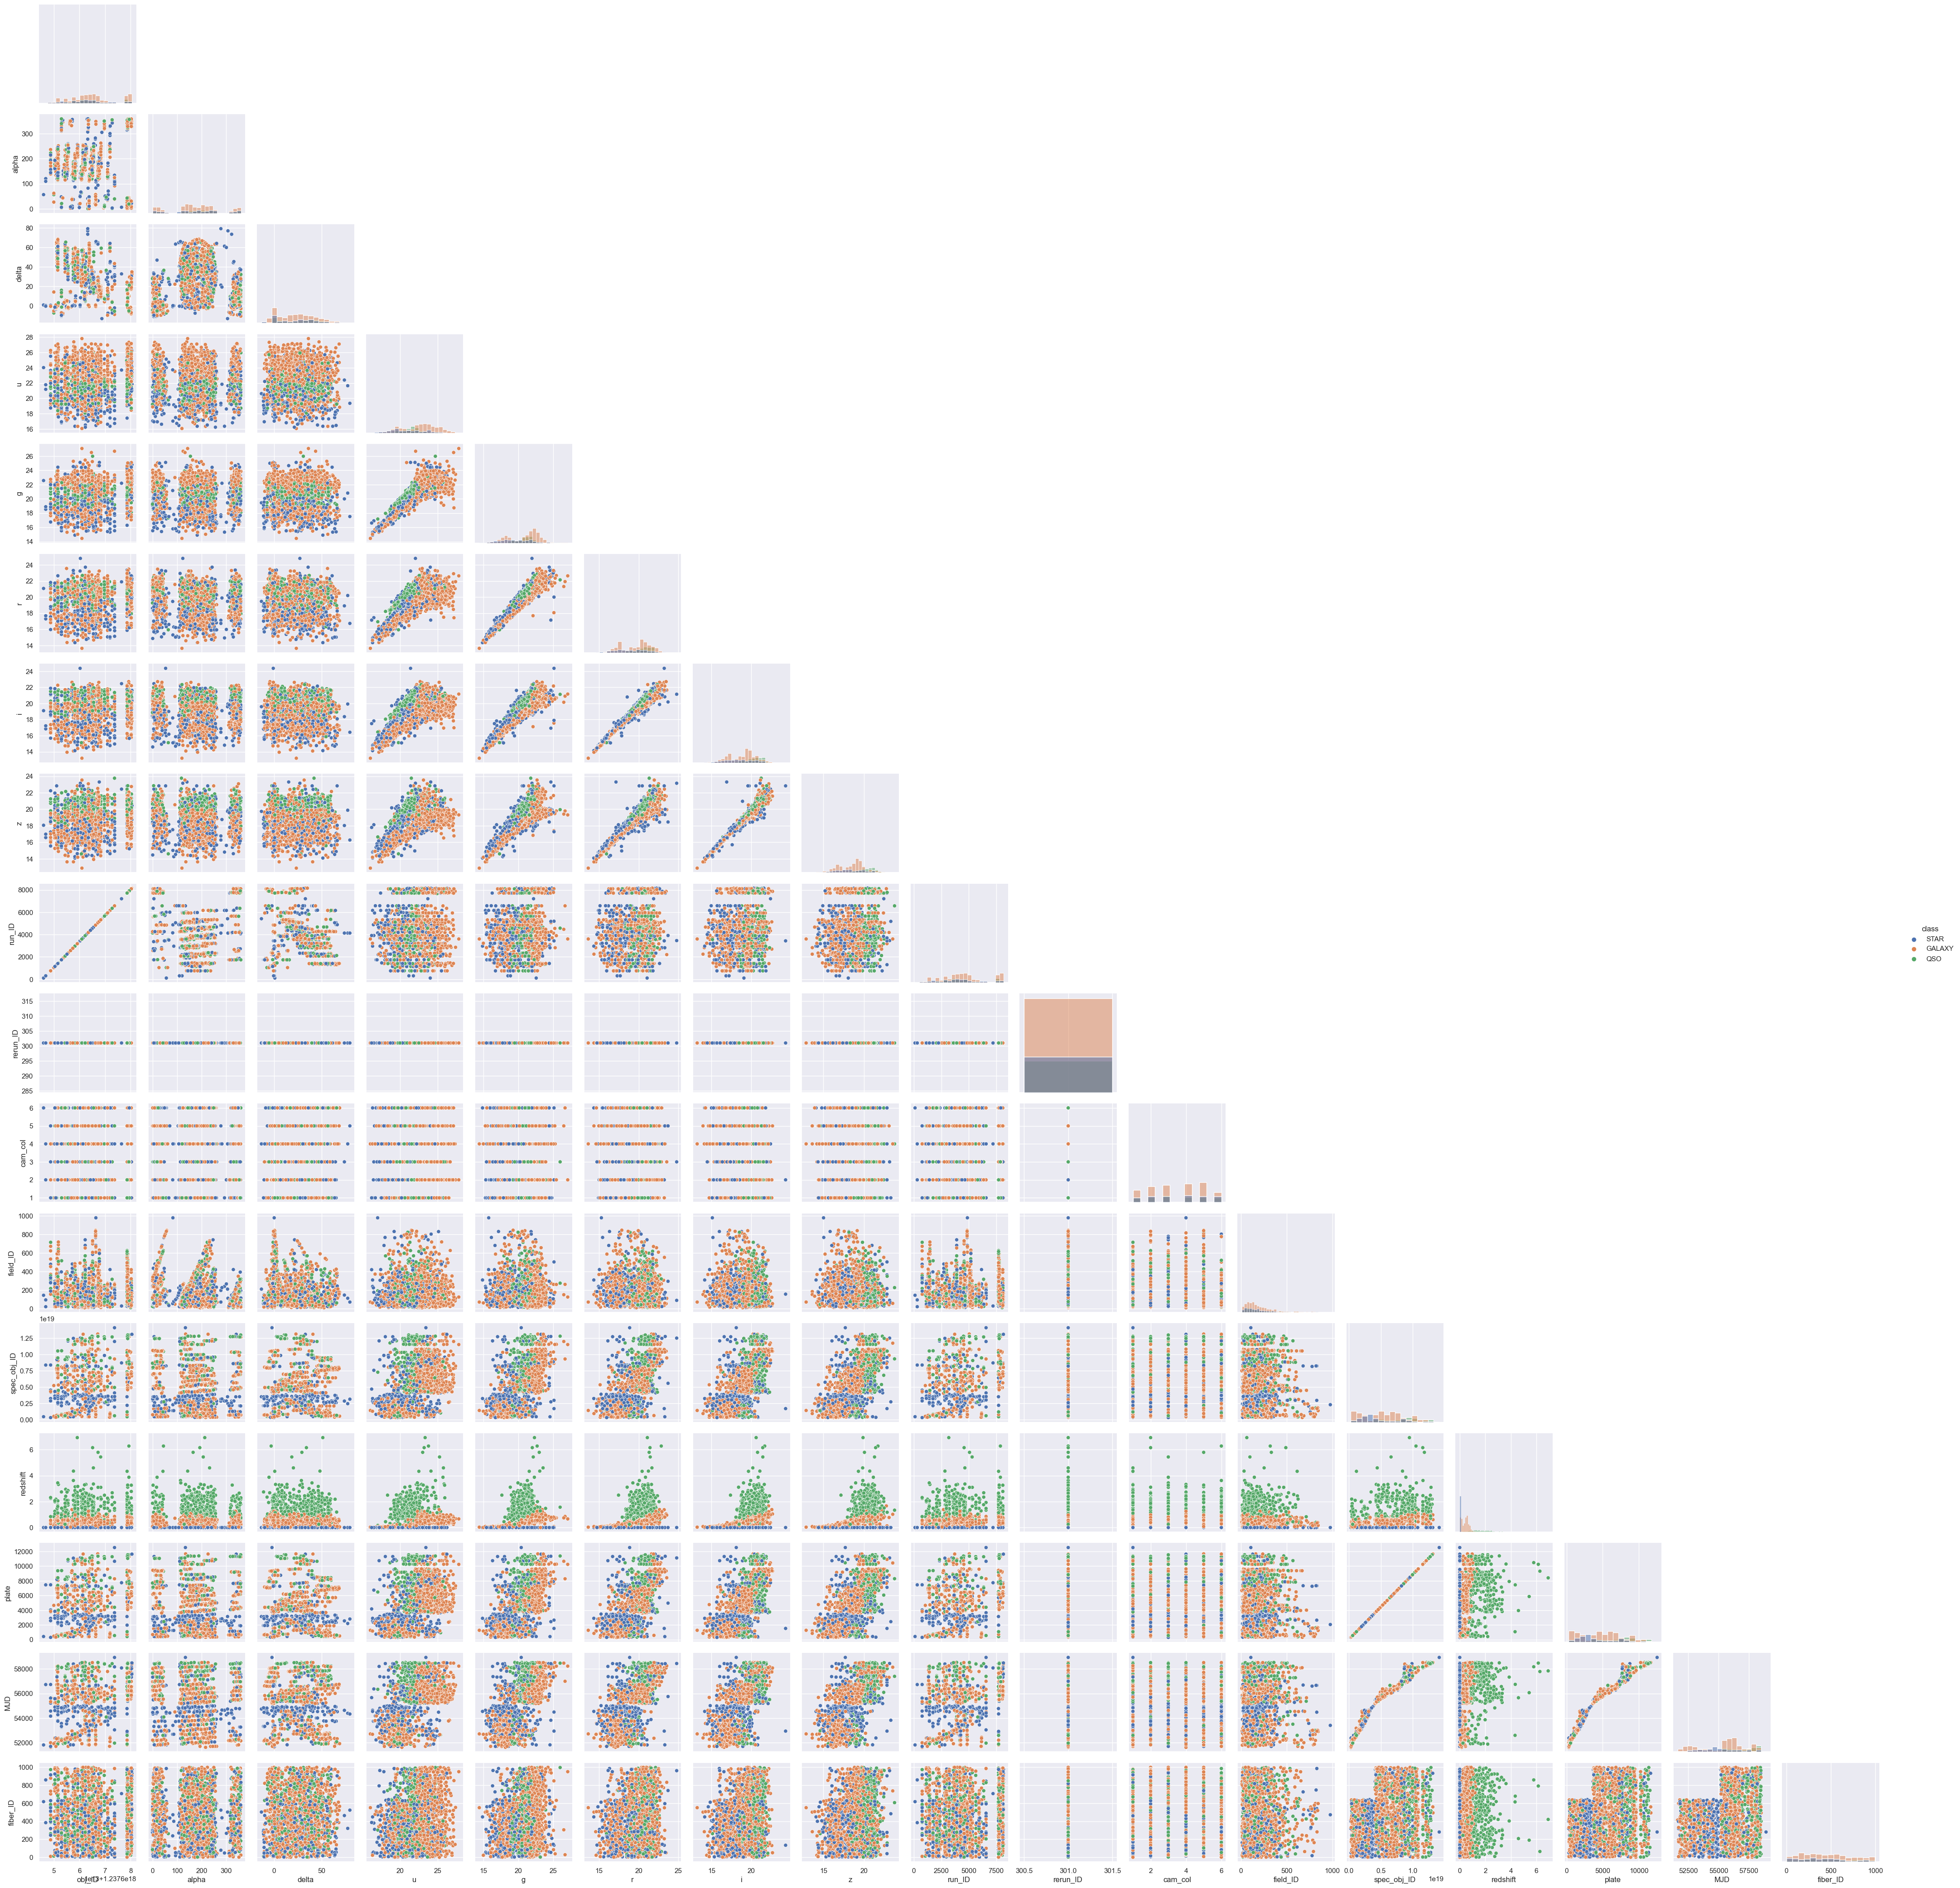

In [19]:
# Grafico de pairplot
#sns.pairplot(df, hue='class')
# pair_plot = sns.pairplot(df, hue="class", diag_kind="hist", corner=True)# Tarda como 20 minutos en correr
pair_plot = sns.pairplot(df.sample(2000), hue="class", diag_kind="hist", corner=True) 

# Guarda el gráfico en un archivo (por ejemplo, en formato PNG)
pair_plot.savefig('pair_plot.png')
plt.show()


<a id="preprocesado"></a>

## 4. Preprocesado de datos

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>



### Codificación de variables categoricas.

Como vimos class y cam_col son categóricas

- Vamos a usa label encoder con class 
- Vamos a usar Hot encoding con cam_col

Para la feature '``class``' reemplazaremos por los siguientes valores:

- 0 = GALAXY
- 1 = OSO
- 2 = STAR

Para la feature '``cam_col``' reemplazaremos por los siguientes valores:

- 0 = 1
- 1 = 2
- 2 = 3
- 3 = 4
- 4 = 5
- 5 = 6

In [16]:
# hago una copia del dataset
df_label_encoder = df.copy()

In [17]:
from sklearn.preprocessing import LabelEncoder # Codificar variables categóricas

# convertimos la columna 'class' a valores numéricos

# Definir una función lambda para mapear los valores a números
le = LabelEncoder()

df_label_encoder['class']=le.fit_transform(df_label_encoder['class'])

# convertimos la columna 'cam_col' a valores numéricos
df_label_encoder['cam_col']=le.fit_transform(df_label_encoder['cam_col'])

In [18]:
# Verificamos los valores únicos de la columna 'class'
df_label_encoder['class'].unique() 

array([0, 1, 2])

In [19]:
# Verificamos los valores únicos de la columna 'cam_col'
df_label_encoder['cam_col'].unique()

array([1, 4, 2, 3, 5, 0])

In [20]:
df_label_encoder.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        1        79  6.543777e+18   
1  21.16812  21.61427    4518       301        4       119  1.176014e+19   
2  19.34857  18.94827    3606       301        1       120  5.152200e+18   
3  20.50454  19.25010    4192       301        2       214  1.030107e+19   
4  15.97711  15.54461    8102       301        2       137  6.891865e+18   

   class  redshift  plate    MJD  fiber_ID  
0      0  0.634794   5812  56354       171  
1      0  0.779136  10445  58158       427  
2      0  0.644195   4576  55592       299  
3      0  0.932346   9149  58039       775  
4      0  0.116123   6121  56187       842

In [21]:
df_label_encoder.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

Separamos las variables númericas y la feature objetivo

In [22]:
NUMERICAL_FEATURES = ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']

In [23]:
LABEL = 'class'

In [24]:
# veamos si hay valores nulos
df_label_encoder.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [25]:
# La columna rerun_ID tiene un solo valor, por lo que no aporta información
NUMERICAL_FEATURES.remove('rerun_ID') 

# Elimino la columna rerun_ID
df_label_encoder.drop(columns=['rerun_ID'], inplace=True)

In [26]:
NUMERICAL_FEATURES

['obj_ID',
 'alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run_ID',
 'cam_col',
 'field_ID',
 'spec_obj_ID',
 'redshift',
 'plate',
 'MJD',
 'fiber_ID']

### Veamos la correlación

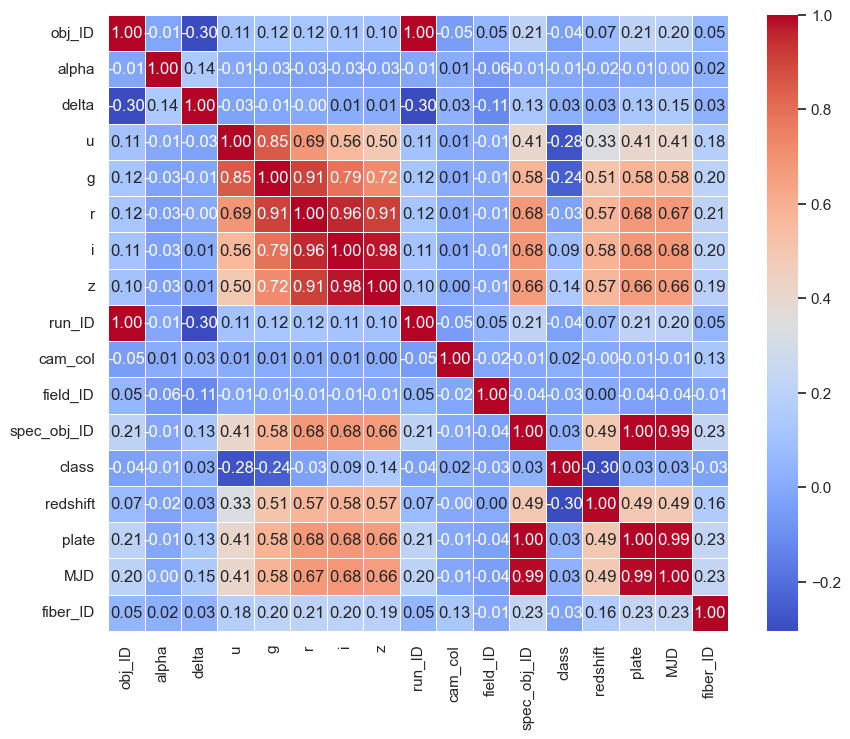

In [27]:
# Tabla de correlacion completa
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(df_label_encoder.corr("spearman"), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Mostrar el gráfico
plt.show()

In [29]:
# Imprimo los valores de mayor a menor de correlación con la variable objetivo
#df.corr()['class'].sort_values(ascending=False)

# Imprimo los valores de mayor a menor de correlación con la variable objetivo pero el valor absoluto
df_label_encoder.corr("spearman")['class'].abs().sort_values(ascending=False)

class          1.000000
redshift       0.304301
u              0.280591
g              0.244818
z              0.142171
i              0.087809
run_ID         0.039164
obj_ID         0.039022
r              0.034202
MJD            0.031478
field_ID       0.031277
spec_obj_ID    0.031188
plate          0.031186
fiber_ID       0.028011
delta          0.025666
cam_col        0.021264
alpha          0.011693
Name: class, dtype: float64

In [30]:
# Eliminemos las columnas que tienen una correlación mayor a 0.6 con otra columna
# Elimino la columna obj_ID
NUMERICAL_FEATURES.remove('obj_ID') # obj_ID tiene una correlación de 1 con spec_obj_ID
NUMERICAL_FEATURES.remove('run_ID') # run_ID tiene una correlación de 1 con MJD
NUMERICAL_FEATURES.remove('g') # g tiene una correlación de 0.98 con u
NUMERICAL_FEATURES.remove('r') # r tiene una correlación de 0.96 con i y 0.92 con z
NUMERICAL_FEATURES.remove('z') # z tiene una correlación de 0.98 con redshift
NUMERICAL_FEATURES.remove('spec_obj_ID') # spec_obj_ID tiene una correlación de 1 con obj_ID
NUMERICAL_FEATURES.remove('MJD') # MJD tiene una correlación de 1 con run_ID
NUMERICAL_FEATURES.remove('plate') # plate tiene una correlación de 1 con fiber_ID


# Elimino la columnas que tienen una correlación mayor a 0.6 con otra columna
df_label_encoder.drop(columns=['obj_ID'], inplace=True)
df_label_encoder.drop(columns=['run_ID'], inplace=True)
df_label_encoder.drop(columns=['g'], inplace=True)
df_label_encoder.drop(columns=['r'], inplace=True)
df_label_encoder.drop(columns=['z'], inplace=True)
df_label_encoder.drop(columns=['spec_obj_ID'], inplace=True)
df_label_encoder.drop(columns=['MJD'], inplace=True)
df_label_encoder.drop(columns=['plate'], inplace=True)



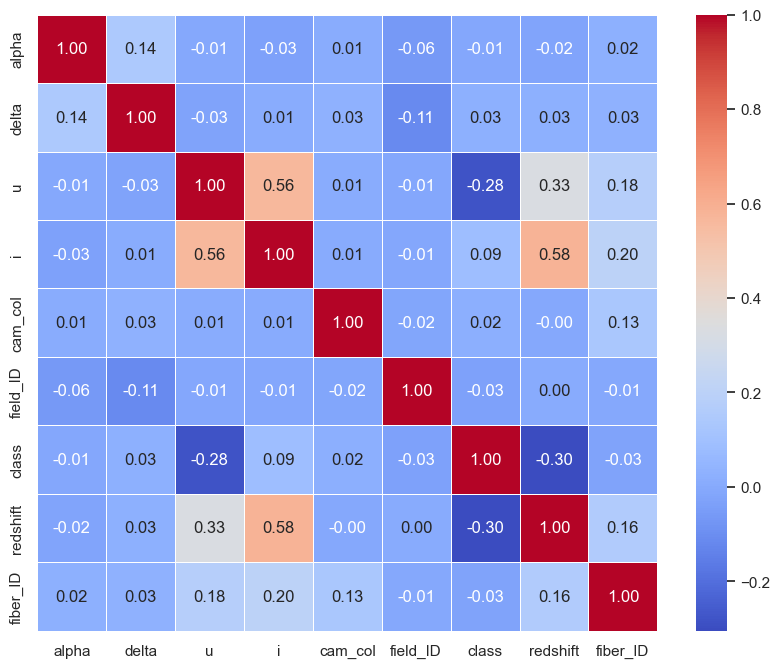

In [31]:
# Tabla de correlacion completa
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(df_label_encoder.corr("spearman"), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Mostrar el gráfico
plt.show()

<a id="division"></a>

## 5. División en entrenamiento y prueba

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [32]:
# como siempre vamos separando nuestras variables predictoras de la variable a predecir
X = df_label_encoder.loc[:,NUMERICAL_FEATURES].values
y = df_label_encoder.loc[:,LABEL].values

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [34]:
# Escalamiento de los datos
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

<a id="pycaret"></a>

## 6. Probemos autoML con pycaret

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>




In [35]:
df_label_encoder.head()

alpha      delta         u         i  cam_col  field_ID  class  \
0  135.689107  32.494632  23.87882  19.16573        1        79      0   
1  144.826101  31.274185  24.77759  21.16812        4       119      0   
2  142.188790  35.582444  25.26307  19.34857        1       120      0   
3  338.741038  -0.402828  22.13682  20.50454        2       214      0   
4  345.282593  21.183866  19.43718  15.97711        2       137      0   

   redshift  fiber_ID  
0  0.634794       171  
1  0.779136       427  
2  0.644195       299  
3  0.932346       775  
4  0.116123       842

In [36]:
from pycaret.classification import * # Importo todas las funciones de clasificación de PyCaret

In [37]:
# La función setup inicializa el entorno en PyCaret y crea el pipeline de transformación

#clf = setup(data=df, target='class') # Usen este para solo CPU
clf = setup(data=df_label_encoder, target='class', use_gpu=True) # Usen este si tienen GPU

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3080 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3080 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

In [38]:
%time # Para ver cuanto tarda en ejecutarse esta celda
# Tarda bastante en ejecutarse, depende de la computadora

# Comparo todos los modelos disponibles y devuelvo el mejor
best_model = compare_models()

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 4.05 µs


>
  - Con CPU Tardo  52m 52s
  - Con GPU Tardo  13m 21.4s. Usando el Hotendencoder de la cam_col, mientras que no usandolo y usando el dataframe puro, tardo 12m.

<a id="dt"></a>

## 7. Primer modelo: Decision Tree

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>



In [39]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el arbol
classification = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                        max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                        random_state=42)
# Y entrenamos
classification.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

In [40]:
from sklearn.tree import export_graphviz
import graphviz # Para visualizar el arbol en formato dot o exportarlo a pdf o png


In [41]:
export_graphviz(classification, out_file = "arbol_clasificacion.dot",feature_names=NUMERICAL_FEATURES)

In [42]:
graph = graphviz.Source.from_file('arbol_clasificacion.dot')
graph.render('arbol_clasificacion', format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.411594 to fit


'arbol_clasificacion.png'

#### Veamos la imagen generada del árbol. 
<img src="arbol_clasificacion.png" height="1024px">

In [43]:
from sklearn.metrics import f1_score

y_pred_train = classification.predict(X_train)
y_pred = classification.predict(X_test)

f1_train = f1_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"F1-score de entrenamiento fue: {f1_train}")
print(f"F1-score de testeo fue: {f1}")

F1-score de entrenamiento fue: 1.0
F1-score de testeo fue: 0.9493717147796339


#### Usemos Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score

In [45]:
%time # Para ver cuanto tarda en ejecutarse esta celda

# Hagamos Cross-validation para varios valores de profundidad del arbol
scores_list = [] # Lista para guardar los scores de cada fold de cada profundidad
depth_array = np.arange(1, 30) # Array con los valores de profundidad del arbol a probar
leaf_array = np.zeros_like(depth_array) # Array para guardar la cantidad de hojas de cada arbol de cada profundidad
for index, depth in enumerate(depth_array): # Itero por cada profundidad
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth) # Creo el arbol con la profundidad actual
    # Crear un scorer personalizado
    macro_f1_scorer = make_scorer(f1_score, average='macro') # Creo el scorer con la funcion f1_score y le paso el parametro average='macro' porque es un problema multiclase si o si tiene que ser macro
    #scores_list.append(np.abs(cross_val_score(clf, X_train, y_train, cv=10, scoring='f1')))
    scores_list.append(np.abs(cross_val_score(clf, X_train, y_train, cv=10, scoring=macro_f1_scorer, n_jobs=-1))) # Guardo los scores de cada fold de cada profundidad en la lista
    clf.fit(X_train, y_train) # Entreno el arbol con la profundidad actual

scores_array = np.array(scores_list) # Convierto la lista a un array de numpy para poder manipularlo mejor
del scores_list # Borro la lista para liberar memoria

df_results = pd.DataFrame({"depth": depth_array, # Creo un dataframe con los resultados
                           "f11": scores_array[:, 0], 
                           "f12": scores_array[:, 1], 
                           "f13": scores_array[:, 2],
                           "f14": scores_array[:, 3],
                           "f15": scores_array[:, 4]})# Guardo los scores de cada fold de cada profundidad en el dataframe

df_results = pd.melt(df_results, id_vars=['depth'], value_vars=["f11", "f12", "f13", "f14", "f15"]) # Derrito el dataframe para poder graficarlo mejor

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 8.58 µs


In [46]:
# Ordenamos los resultados ordenados por score
df_results_sorted = df_results.sort_values(by='value', ascending=False)

In [47]:
df_results_sorted

depth variable     value
124      9      f15  0.970061
125     10      f15  0.969697
36       8      f12  0.967897
123      8      f15  0.967651
127     12      f15  0.967423
..     ...      ...       ...
116      1      f15  0.617573
87       1      f14  0.615802
0        1      f11  0.615802
29       1      f12  0.615508
58       1      f13  0.613600

[145 rows x 3 columns]

- El mejor valor de depth es 9 con una precisión promedio de 0.975062

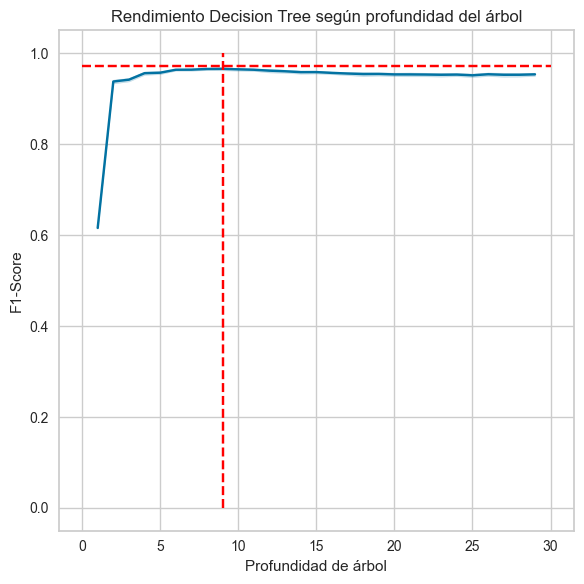

In [48]:
f, ax = plt.subplots(1,1, figsize=(6, 6))
sns.lineplot(data=df_results, x="depth", y="value", errorbar="sd", ax=ax)
ax.plot([9, 9], [0., 1], color="red", linestyle="--")
ax.plot([0, 30], [0.971, 0.971], color="red", linestyle="--")

plt.title("Rendimiento Decision Tree según profundidad del árbol")
ax.set_xlabel("Profundidad de árbol")
ax.set_ylabel("F1-Score")
plt.tight_layout()

- Entrenamos el modelo usando los mejores parámetros depth = 9

In [49]:
# Creamos el arbol
classification = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=42)
# Y entrenamos
classification.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

- Grafiquemos la curva ROC para cada una de las clases

In [50]:
y_pred = classification.predict_proba(X_test)


In [51]:
# from sklearn.metrics import roc_curve, auc

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# n_classes = y_pred.shape[1]  # Número de clases

# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Graficar la curva ROC para cada clase
# for i in range(n_classes):
#     plt.figure()
#     plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
#     plt.xlabel('Tasa de Falsos Positivos')
#     plt.ylabel('Tasa de Verdaderos Positivos')
#     plt.title('Curva ROC de la clase {0}'.format(i))
#     plt.legend(loc="lower right")
#     plt.show()

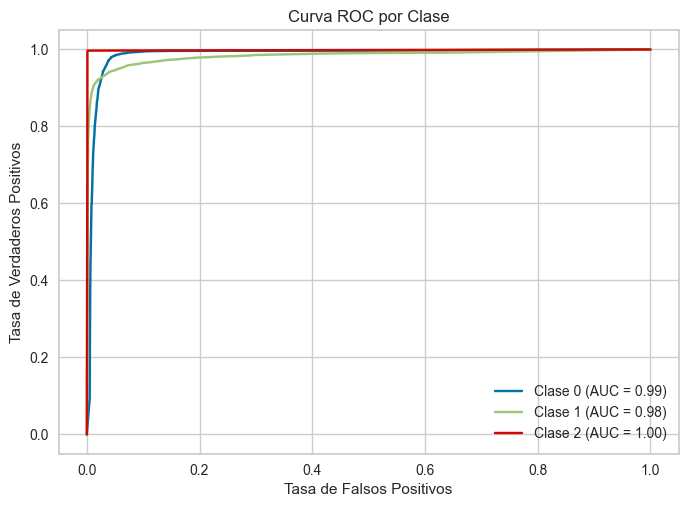

In [53]:
from sklearn.metrics import roc_curve, auc

#Vamos a graficar la curva ROC para todas las clases en una figura y AUC para cada clase a la vez
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_pred.shape[1]  # Número de clases

# Calcular FPR, TPR y AUC para cada clase
for i in range(n_classes):
    #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para todas las clases en una figura
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:0.2f})')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc="lower right")
plt.show()

In [54]:
export_graphviz(classification, out_file = "arbol_clasificacion_level9.dot",feature_names=NUMERICAL_FEATURES)

In [55]:
# Convertimos el archivo DOT en un archivo PNG.
graph = graphviz.Source.from_file('arbol_clasificacion_level9.dot')
graph.render('arbol_clasificacion_level9', format='png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.865936 to fit


'arbol_clasificacion_level9.png'

#### Veamos la imágen generada del árbol con mejores hiperparámetros. 
<img src="arbol_clasificacion_level9.png" height="1024px">

<a id="knn"></a>

## 8. Segundo modelo: KNN

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el clasificador KNN
clasificacion_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')

# Y entrenamos
clasificacion_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:

y_pred_train = clasificacion_knn.predict(X_train)
y_pred = clasificacion_knn.predict(X_test)

f1_train = f1_score(y_train, y_pred_train, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"F1-score de entrenamiento KNN fue: {f1_train}")
print(f"F1-score de testeo KNN fue: {f1}")

F1-score de entrenamiento KNN fue: 0.9230858063893242
F1-score de testeo KNN fue: 0.893588682543614


#### Usemos Cross Validation con KNN

In [58]:
%time # Mide el tiempo de ejecución de la celda

# Hagamos Cross-validation para varios número de vecinos
scores_list = []
k_array = np.arange(1, 31)
for index, k in enumerate(k_array):
    clasificacion_knn = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=2) #, weights='uniform', algorithm='auto')
    # Crear un scorer personalizado
    macro_f1_scorer = make_scorer(f1_score, average='macro')
    scores_list.append(np.abs(cross_val_score(clasificacion_knn, X_train, y_train, cv=10, scoring=macro_f1_scorer, n_jobs=-1)))
    clasificacion_knn.fit(X_train, y_train)

scores_array = np.array(scores_list)
del scores_list

df_results = pd.DataFrame({"k_range": k_array,
                           "f11": scores_array[:, 0],
                           "f12": scores_array[:, 1],
                           "f13": scores_array[:, 2],
                           "f14": scores_array[:, 3],
                           "f15": scores_array[:, 4]})

df_results = pd.melt(df_results, id_vars=['k_range'], value_vars=["f11", "f12", "f13", "f14", "f15"])

# Ordenemos por value
df_results_sorted = df_results.sort_values(by='value', ascending=False)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 5.48 µs


In [59]:
df_results_sorted

k_range variable     value
92         3      f14  0.894530
98         9      f14  0.893953
94         5      f14  0.892928
34         5      f12  0.892369
124        5      f15  0.892257
..       ...      ...       ...
59        30      f12  0.853461
27        28      f11  0.852171
29        30      f11  0.850604
31         2      f12  0.848792
1          2      f11  0.842893

[150 rows x 3 columns]

- El mejor valor de K es 3 con una precisión promedio de 0.909558

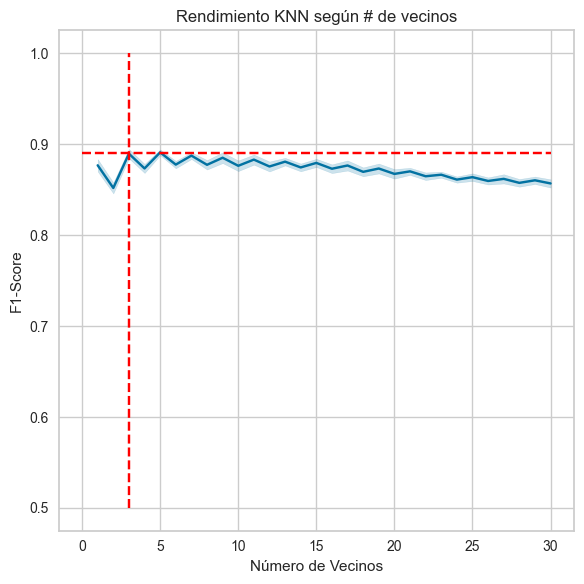

In [61]:
# Tomando el mejor valor de K, y el promedio de los 10 folds graficamos

f, ax = plt.subplots(1,1, figsize=(6, 6))
sns.lineplot(data=df_results, x="k_range", y="value", errorbar="sd", ax=ax)
ax.plot([3, 3], [0.5, 1], color="red", linestyle="--")
ax.plot([0, 30], [0.89, 0.89], color="red", linestyle="--")

plt.title("Rendimiento KNN según # de vecinos")
ax.set_xlabel("Número de Vecinos")
ax.set_ylabel("F1-Score")
plt.tight_layout()

- Entrenamos el modelo usando los mejores parámetros k = 3

In [83]:
# Creamos el clasificador KNN
clasificacion_knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)

# Y entrenamos
clasificacion_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

- Grafiquemos la curva ROC para cada una de las clases 

In [84]:
y_pred = clasificacion_knn.predict_proba(X_test)

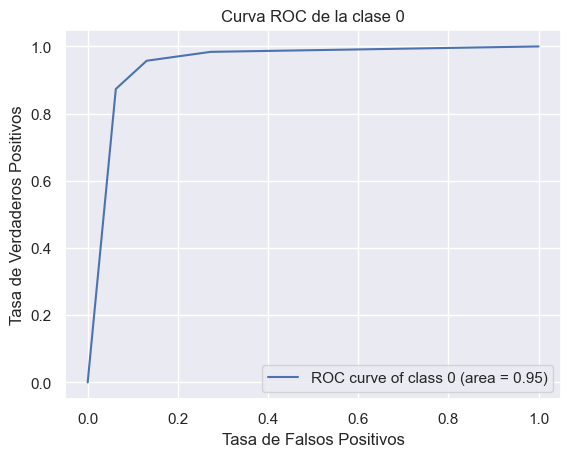

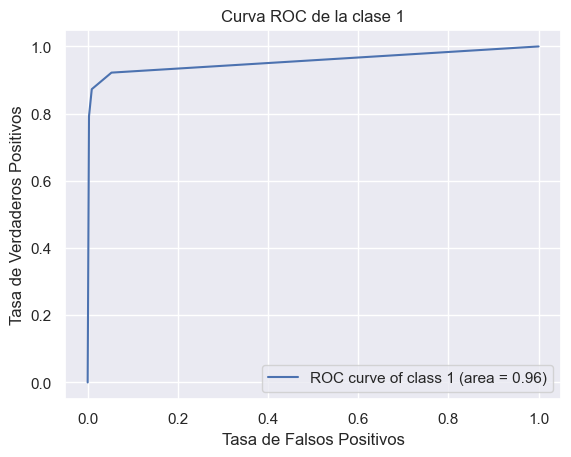

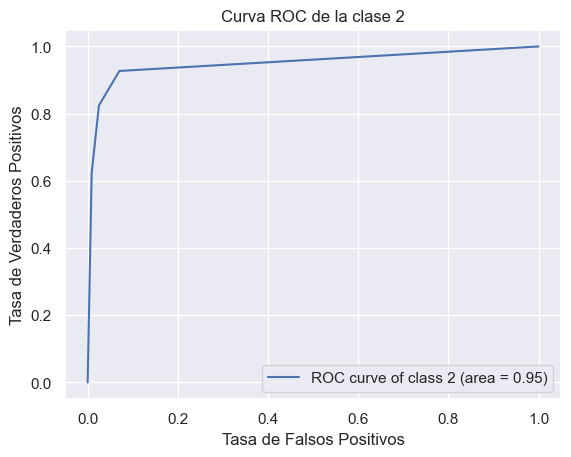

In [85]:
# from sklearn.metrics import roc_curve, auc

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# n_classes = y_pred.shape[1]  # Número de clases

# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Graficar la curva ROC para cada clase
# for i in range(n_classes):
#     plt.figure()
#     plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
#     plt.xlabel('Tasa de Falsos Positivos')
#     plt.ylabel('Tasa de Verdaderos Positivos')
#     plt.title('Curva ROC de la clase {0}'.format(i))
#     plt.legend(loc="lower right")
#     plt.show()

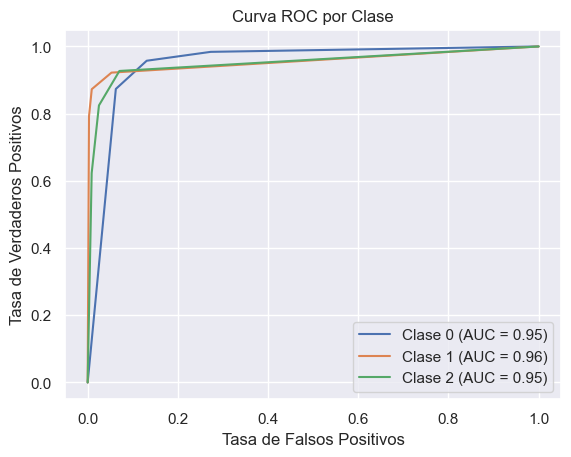

In [86]:
#Vamos a graficar la curva ROC para todas las clases en una figura y AUC para cada clase a la vez
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_pred.shape[1]  # Número de clases

# Calcular FPR, TPR y AUC para cada clase
for i in range(n_classes):
    #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para todas las clases en una figura
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:0.2f})')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc="lower right")
plt.show()


<a id="rf"></a>

## 9. Tercer modelo: Random Forest

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier

In [88]:
%time # Para ver cuanto tarda en ejecutarse la celda

scores_list = [] # Lista para guardar los scores de cada fold
depth_array = np.arange(1, 30) # Ejemplo de diferentes profundidades
estimators_array = [10, 50, 100, 200]  # Ejemplo de diferentes números de árboles
results = [] # Lista para guardar los resultados

for depth in depth_array: # Recorrer las profundidades
    for n_estimators in estimators_array:
        clf = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', max_depth=depth, random_state=42, n_jobs=-1)

        # Crear un scorer personalizado
        macro_f1_scorer = make_scorer(f1_score, average='macro')

        # Calcular los scores usando cross-validation
        scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=macro_f1_scorer, n_jobs=-1)
        scores_mean = np.abs(scores).mean()

        # Guardar los resultados
        results.append({'depth': depth, 'n_estimators': n_estimators, 'score': scores_mean})

# Convertir los resultados en un DataFrame
df_results = pd.DataFrame(results)

# Si deseas ver los resultados ordenados por score
df_results_sorted = df_results.sort_values(by='score', ascending=False)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.5 µs


In [89]:
df_results_sorted

depth  n_estimators     score
95      24           200  0.975193
111     28           200  0.975173
107     27           200  0.975154
87      22           200  0.975127
99      25           200  0.975079
..     ...           ...       ...
4        2            10  0.624067
0        1            10  0.615476
2        1           100  0.332398
3        1           200  0.322135
1        1            50  0.262470

[116 rows x 3 columns]

Mejores parametros:
- n_estimators = 200
- depth = 24

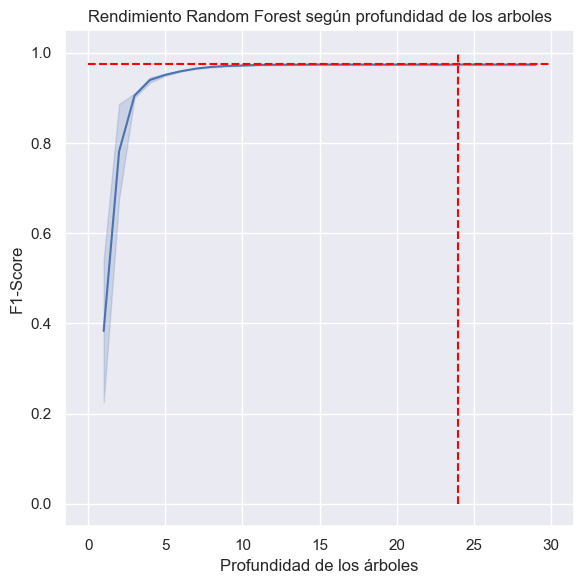

In [90]:
f, ax = plt.subplots(1,1, figsize=(6, 6))
sns.lineplot(data=df_results, x="depth", y="score", errorbar="sd", ax=ax)
ax.plot([24, 24], [0., 1], color="red", linestyle="--")
ax.plot([0, 30], [0.975, 0.975], color="red", linestyle="--")

plt.title("Rendimiento Random Forest según profundidad de los arboles")
ax.set_xlabel("Profundidad de los árboles")
ax.set_ylabel("F1-Score")
plt.tight_layout()

In [91]:
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=24, random_state=42, n_jobs=-1)

In [92]:
# Entrenar el modelo usando el conjunto de entranamiento
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=24, n_estimators=200,
                       n_jobs=-1, random_state=42)

- Grafiquemos la curva ROC para cada una de las clases 

In [93]:
y_pred = rf.predict_proba(X_test)

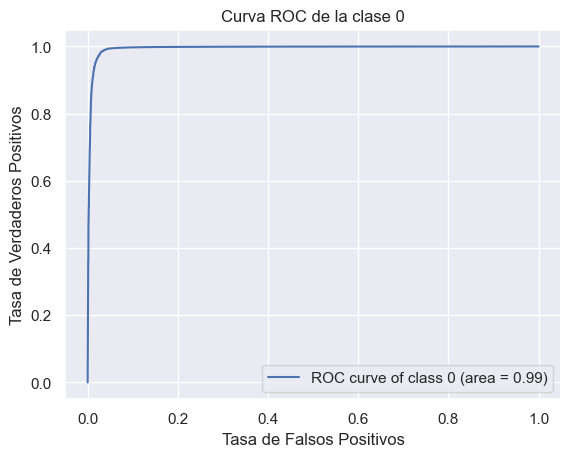

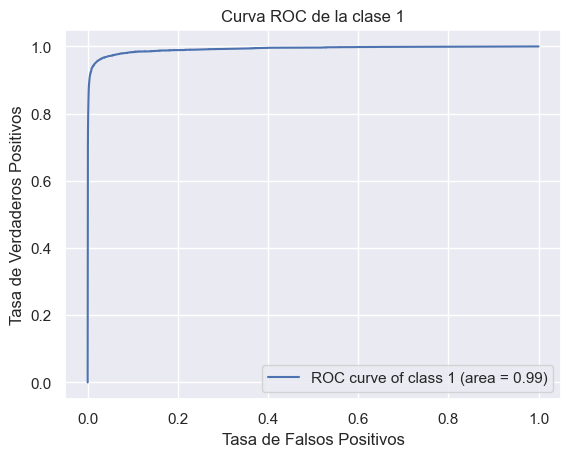

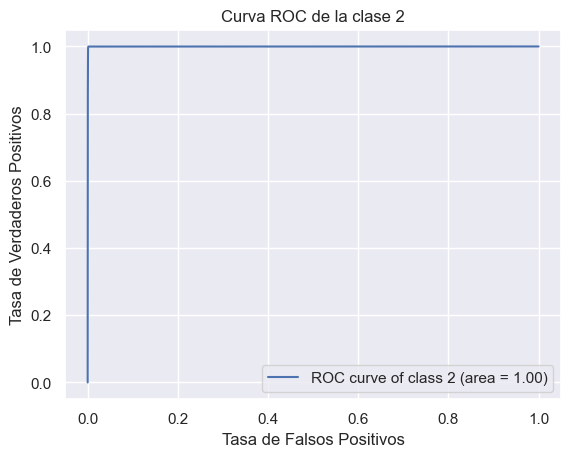

In [94]:
# from sklearn.metrics import roc_curve, auc

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# n_classes = y_pred.shape[1]  # Número de clases

# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Graficar la curva ROC para cada clase
# for i in range(n_classes):
#     plt.figure()
#     plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
#     plt.xlabel('Tasa de Falsos Positivos')
#     plt.ylabel('Tasa de Verdaderos Positivos')
#     plt.title('Curva ROC de la clase {0}'.format(i))
#     plt.legend(loc="lower right")
#     plt.show()

>   

    - En esta parte grafique la curva ROC y los valores AUC de cada clase, Era redundante tener los gráficos anteriores y este.
    - Luego elimino los anteriores y dejare este.

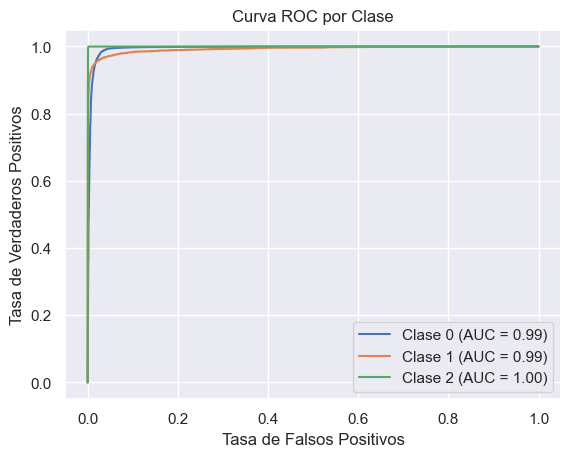

In [96]:
#Vamos a graficar la curva ROC para todas las clases en una figura y AUC para cada clase a la vez
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_pred.shape[1]  # Número de clases

# Calcular FPR, TPR y AUC para cada clase
for i in range(n_classes):
    #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para todas las clases en una figura
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:0.2f})')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc="lower right")
plt.show()


<a id="qda"></a>

## 10. Cuarto modelo: QDA

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [71]:
#TODO [QDA] Falta impelemntar QDA comun y con Cross Validation

<a id="lda"></a>

## 11. Quinto modelo: LDA

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [72]:
#TODO [LDA] Falta impelemntar LDA comun y con Cross Validation

<a id="lr"></a>

## 12. Sexto modelo: Regresión Logística

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [73]:
#TODO [RL] Falta impelemntar Regresión Lineal comun y con Cross Validation

<a id="lr"></a>

## 13. Septimo modelo: Light Gradient Boosting Machine (lightgbm

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [97]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Crear el conjunto de datos de LightGBM
train_data = lgb.Dataset(X_train, label=y_train) # Creamos el conjunto de datos de LightGBM para entrenamiento
test_data = lgb.Dataset(X_test, label=y_test) # Creaamos el conjunto de datos de LightGBM para prueba

# Configurar los parámetros para la clasificación multiclase
params = {
    'objective': 'multiclass', # Función objetivo a optimizar
    'num_class': 3, # Número de clases a predecir
    'metric': 'multi_logloss', # Métrica a optimizar (función de pérdida)
    'boosting_type': 'gbdt', # Tipo de algoritmo de boosting a utilizar
    'learning_rate': 0.1, # Tasa de aprendizaje
    'force_col_wise' : True, # Para que no de error de dimensiones en el conjunto de prueba (X_test) evita el overhead de convertir a row-wise
    #'device': 'gpu' # Usar GPU para entrenar, da menos score con GPU. Si no tienen GPU comentarizar esta linea
}

# Entrenar el modelo
clf = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)  # Entrenar el modelo con 100 iteraciones

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test) # Predecir en el conjunto de prueba (devuelve las probabilidades de cada clase)
y_pred_max = [np.argmax(line) for line in y_pred] # Obtener la clase con mayor probabilidad para cada muestra

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_max) # Calcular la exactitud (accuracy) del modelo en el conjunto de prueba
print(f'Accuracy: {accuracy}') # Imprimir la exactitud del modelo


[LightGBM] [Info] Total Bins 3816
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 16
[LightGBM] [Info] Start training from score -0.520395
[LightGBM] [Info] Start training from score -1.663668
[LightGBM] [Info] Start training from score -1.531221
Accuracy: 0.9791


>   
        - Intentemos encontrar los mejores hiperparametros con GridSearchCV

        - Lamentablemente lo cortamos a los 700minutos de ejecución

In [54]:
# Crear un modelo LightGBM
#lgbm = lgb.LGBMClassifier(objective='multiclass', num_class=3, metric='multi_logloss',
#                          boosting_type='gbdt', random_state=42, device='gpu')

# Definir la cuadrícula de hiperparámetros a explorar
# param_grid = {
#     'num_leaves': [31, 50, 70],
#     'num_leaves': [31, 50, 70],
#     'learning_rate': [0.01, 0.1, 0.5],
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 15],
#     'min_child_weight': [1, 5, 10],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
    # Puedes añadir más parámetros aquí según sea necesario
#}

# Crear un GridSearchCV
#grid = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)

# Ajustar el modelo incluyendo un conjunto de validación y early stopping
#grid.fit(X_train, y_train, eval_set=[(X_test, y_test)], callbacks=[lgb.early_stopping(10)])

# Mejores parámetros encontrados
#print('Mejores parámetros:', grid.best_params_)


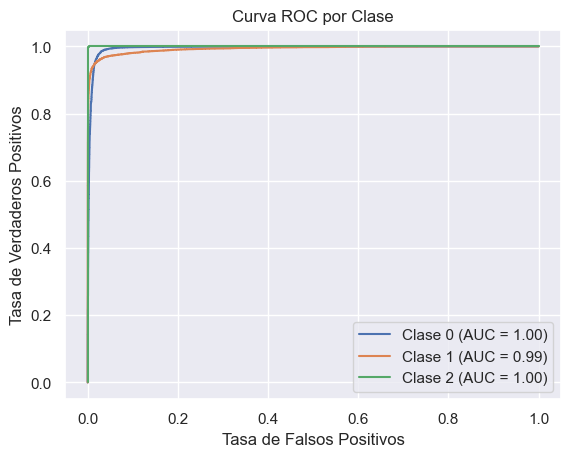

In [98]:
#Vamos a graficar la curva ROC para todas las clases en una figura y AUC para cada clase a la vez
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_pred.shape[1]  # Número de clases

# Calcular FPR, TPR y AUC para cada clase
for i in range(n_classes):
    #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para todas las clases en una figura
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:0.2f})')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC por Clase')
plt.legend(loc="lower right")
plt.show()

<a id="conclusion"></a>

## 14. Conclusión

<a href="#indice"><span></span><strong>Volver al Índice</strong></a>

In [74]:
#TODO [Conclusión] Falta la conclusión